In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#read data
cod_data = pd.read_csv("Cod_cwl_data.csv")

C:\Users\cay10\AppData\Local\Temp\ipykernel_20844\313699122.py:2: DtypeWarning: Columns (1,32,34,35,63,64) have mixed types. Specify dtype option on import or set low_memory=False.
  cod_data = pd.read_csv("Cod_cwl_data.csv")


In [3]:
# get the data point size
len(cod_data)

18552

In [4]:
# data point labels
cod_data.columns

Index(['Unnamed: 0', 'match id', 'series id', 'end time', 'duration (s)',
       'mode', 'map', 'team', 'player', 'win?', 'score', 'kills', 'deaths',
       '+/-', 'k/d', 'kills per 10min', 'deaths per 10min', 'player score',
       'player spm', 'damage dealt', 'ekia', 'assists', 'headshots',
       'suicides', 'team kills', 'team deaths', 'kills (stayed alive)', 'hits',
       'shots', 'accuracy (%)', 'num lives', 'time alive (s)',
       'avg time per life (s)', 'fave weapon', 'fave specialist',
       'fave scorestreaks', 'hill time (s)', 'hill captures', 'hill defends',
       'snd rounds', 'snd firstbloods', 'snd firstdeaths', 'snd survives',
       'bomb pickups', 'bomb plants', 'bomb defuses', 'bomb sneak defuses',
       'snd 1-kill round', 'snd 2-kill round', 'snd 3-kill round',
       'snd 4-kill round', 'ctrl rounds', 'ctrl firstbloods',
       'ctrl firstdeaths', 'ctrl captures', '2-piece', '3-piece', '4-piece',
       '4-streak', '5-streak', '6-streak', '7-streak', '8+-st

In [5]:
# diplay cod_data frame info
cod_data

,Unnamed: 0,match id,series id,end time,duration (s),mode,map,team,player,win?,...,ctf returns,ctf pickups,ctf defends,ctf kill carriers,ctf flag carry time (s),scorestreaks earned,scorestreaks used,scorestreaks deployed,scorestreaks kills,scorestreaks assists
0,0,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Denz,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Seany,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Tommey,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Wuskin,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,missing-pro-w1-1-map-1,pro-w1-1,2019-02-04 18:22:38 UTC,446,Hardpoint,Arsenal,Reciprocity,Zed,L,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18547,2147,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Splyce,Tommey,L,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18548,2148,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Team Kaliber,Accuracy,W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18549,2149,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Team Kaliber,Chino,W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18550,2150,5fe71c96-2160-5cfe-83b0-6c1267e79824,champ-grand-finals-0,2017-12-11 06:40:39 UTC,552,Search & Destroy,Sainte Marie du Mont,Team Kaliber,Kenny,W,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
#helper method to plot missing data
def plot_missing(df, cmap='Blues'):
    """Plot missing percentage of dataset.

    Args:
        df (pd.DataFrame): input dataset.
    """
    assert isinstance(df, pd.DataFrame)

    missing_data = pd.DataFrame({'total_missing': df.isnull().sum(), 'perc_missing': (df.isnull().sum()/82790)*100})
    missing_data = missing_data[missing_data['total_missing'] != 0]
    missing_data = missing_data.sort_values(by='total_missing')
    ax = sns.barplot(data=missing_data, y=missing_data.index, x='perc_missing', palette=cmap)
    plt.xlabel("Missing percentage (%)")
    plt.ylabel("Properties")

    return

## Missing Data (4)

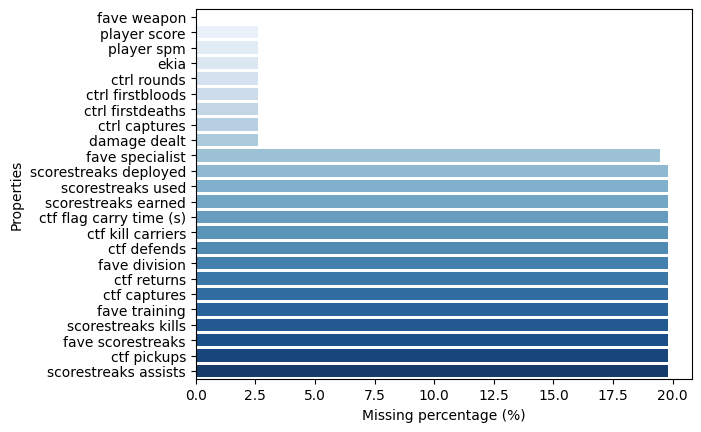

In [7]:
plot_missing(cod_data)

## Player Kill & Death Counts (7)

[Text(0.5, 1.0, 'Player Death Histogram')]

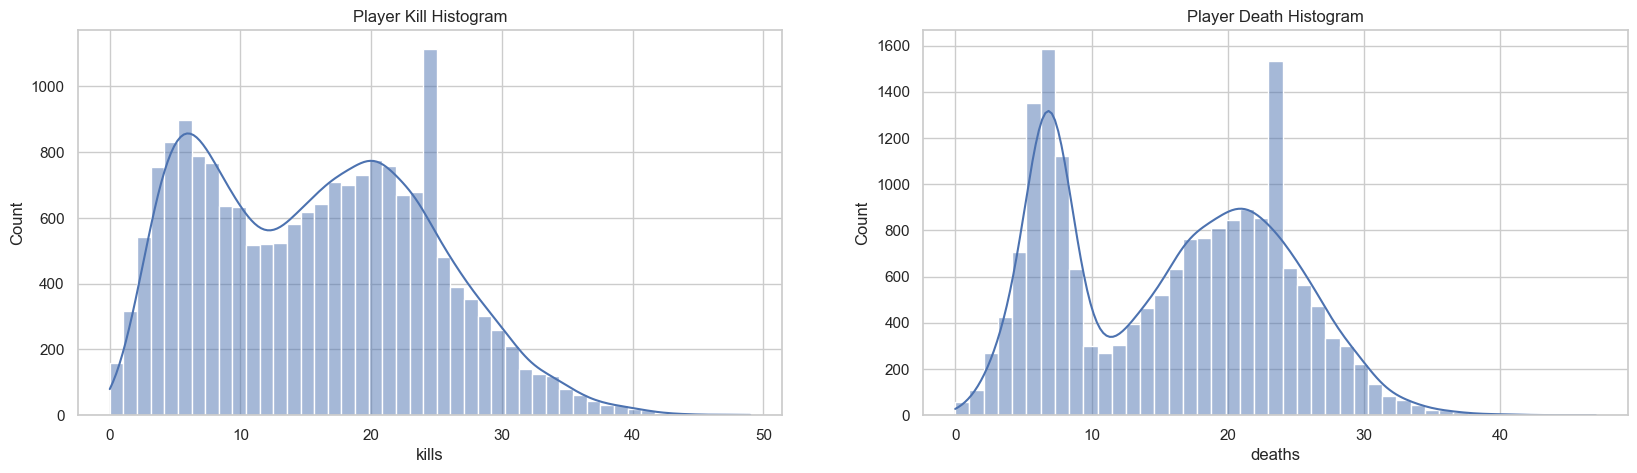

In [8]:
# Player Kill & Death Counts (Page 7)
sns.set(style = "whitegrid", palette = "deep")
fig_01 = plt.figure(figsize = (20,5))
subfig_1 = fig_01.add_subplot(1,2,1)
sns.histplot(cod_data['kills'], kde = True).set(title = "Player Kill Histogram")
subfig_2 = fig_01.add_subplot(1,2,2)

sns.set(style = "whitegrid", palette = "deep", rc={'figure.figsize':(10,10)})
sns.histplot(cod_data['deaths'], kde = True).set(title = "Player Death Histogram")

## Player Score Distribution (8)

[Text(0.5, 1.0, 'Player Score Histogram')]

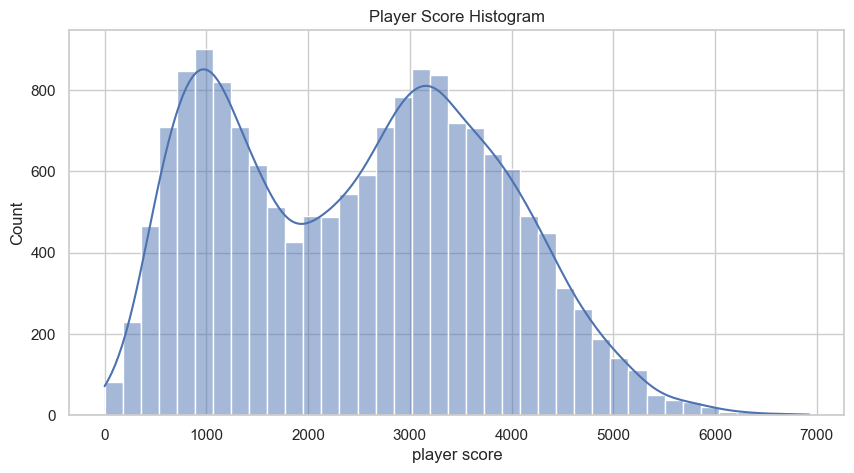

In [9]:
sns.set(style = "whitegrid", palette = "deep")
fig_01 = plt.figure(figsize = (10,5))
sns.histplot(cod_data['player score'], kde = True).set(title = "Player Score Histogram")

In [10]:
# Helper Method for scatter
def scatter_helper(a, b, c, d):
    '''
    Helps plot scatter plots of a vs b vs c
    a: first label
    b: second label
    c: third label
    d: title
    '''
    assert isinstance(a, str)
    assert isinstance(b, str)
    assert isinstance(c, str)
    assert isinstance(d, str)
    sns.set_style('ticks')
    fig, ax = plt.subplots()
    fig.set_size_inches(9, 9)
    hk = sns.scatterplot(x=cod_data[a],y=cod_data[b],size=cod_data[c], sizes=(5,160)).set(title=d)
    plt.legend(title=c, loc='lower right')
    return

## Headshot Kills vs Kill-Death (9)

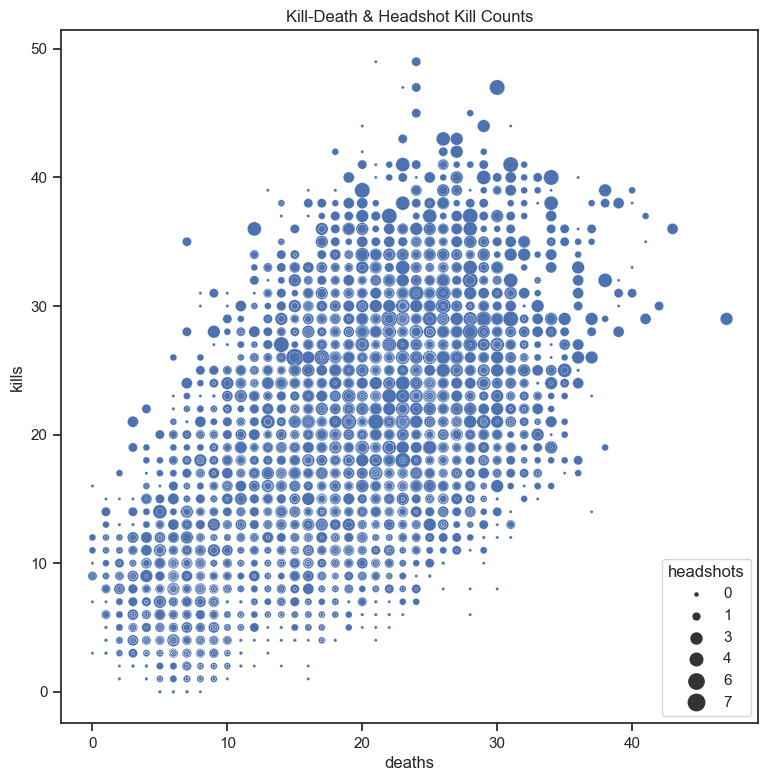

In [11]:
scatter_helper('deaths', 'kills', 'headshots', 'Kill-Death & Headshot Kill Counts')

## Scorestreak Kills vs Kill-Death Counts (10)

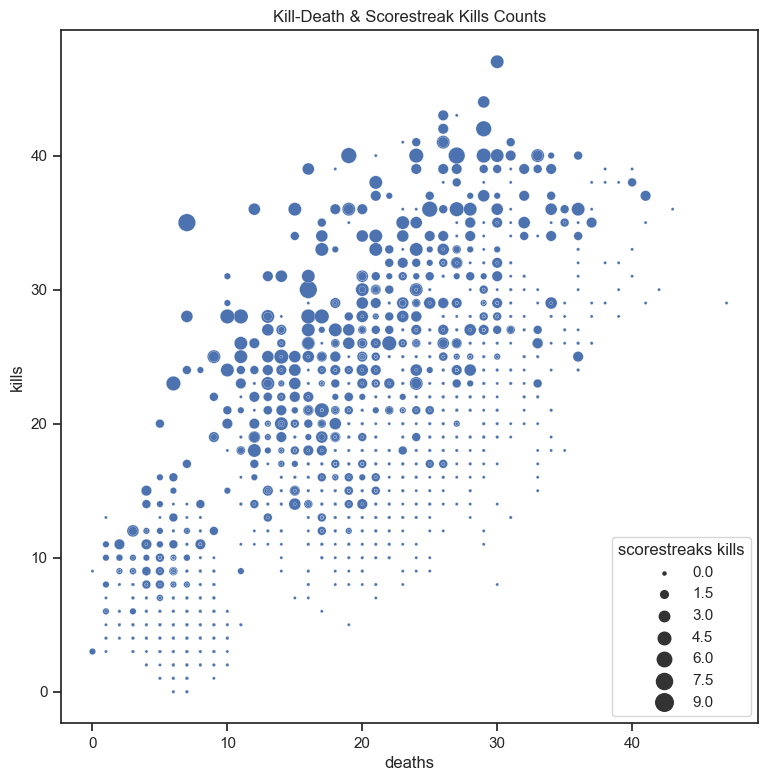

In [12]:
scatter_helper('deaths', 'kills', 'scorestreaks kills', 'Kill-Death & Scorestreak Kills Counts')

## Overall (K/D) Distribution (12)

[Text(0.5, 1.0, 'Player K/D Ratio Distribution')]

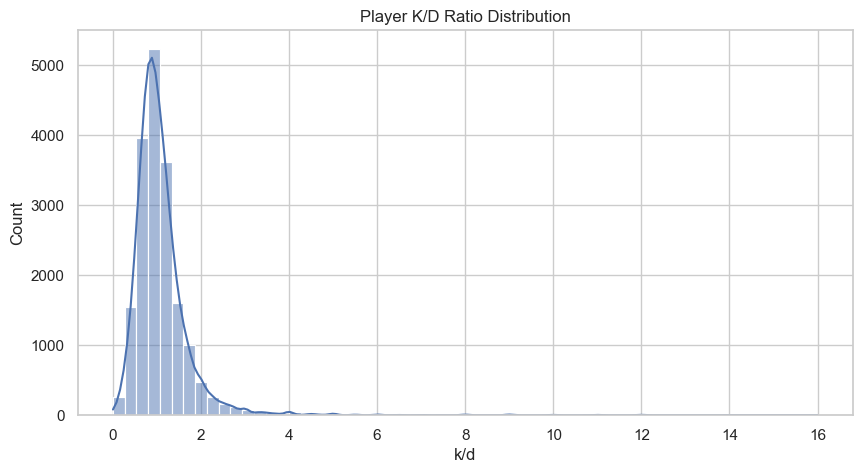

In [13]:
sns.set(style = "whitegrid", palette = "deep", rc={'figure.figsize':(10,5)})
sns.histplot(cod_data['k/d'], kde = True, bins = 60).set(title = "Player K/D Ratio Distribution")

In [14]:
#Violinplot helper method
def violin_helper(a,b, title):
    '''
    helps plot violinplots between data labels in cod_data
    a: first label (string)
    b: second label (string)
    title: title (string)
    '''
    assert isinstance(a, str)
    assert isinstance(b, str)
    assert isinstance(title, str)
    plt.figure()
    sns.set(style="whitegrid", rc={'figure.figsize':(16,10)}, font_scale=1.75)
    sns.violinplot(x=cod_data[a], y=cod_data[b], inner="points", orient="h", scale = "area", width=0.8, palette="pastel").set(title = title)
    return

## Headshot & Scorestreak Revisited (13)

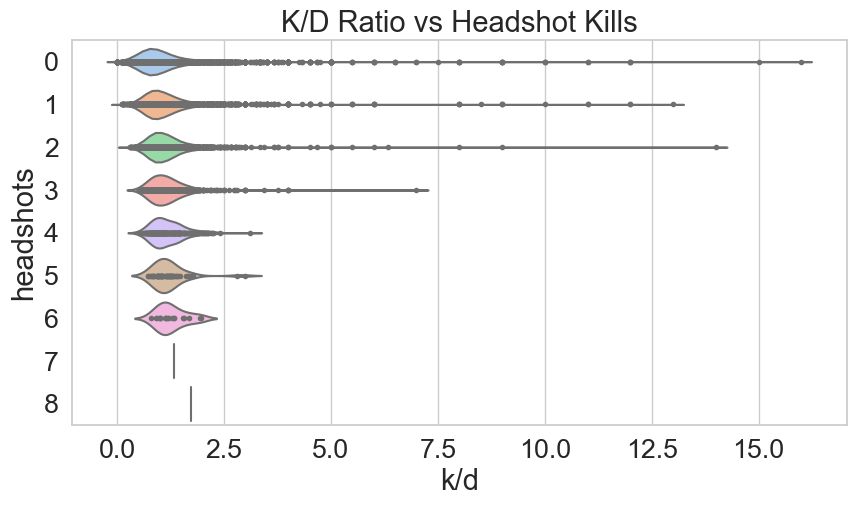

In [15]:
violin_helper('k/d', 'headshots', "K/D Ratio vs Headshot Kills")

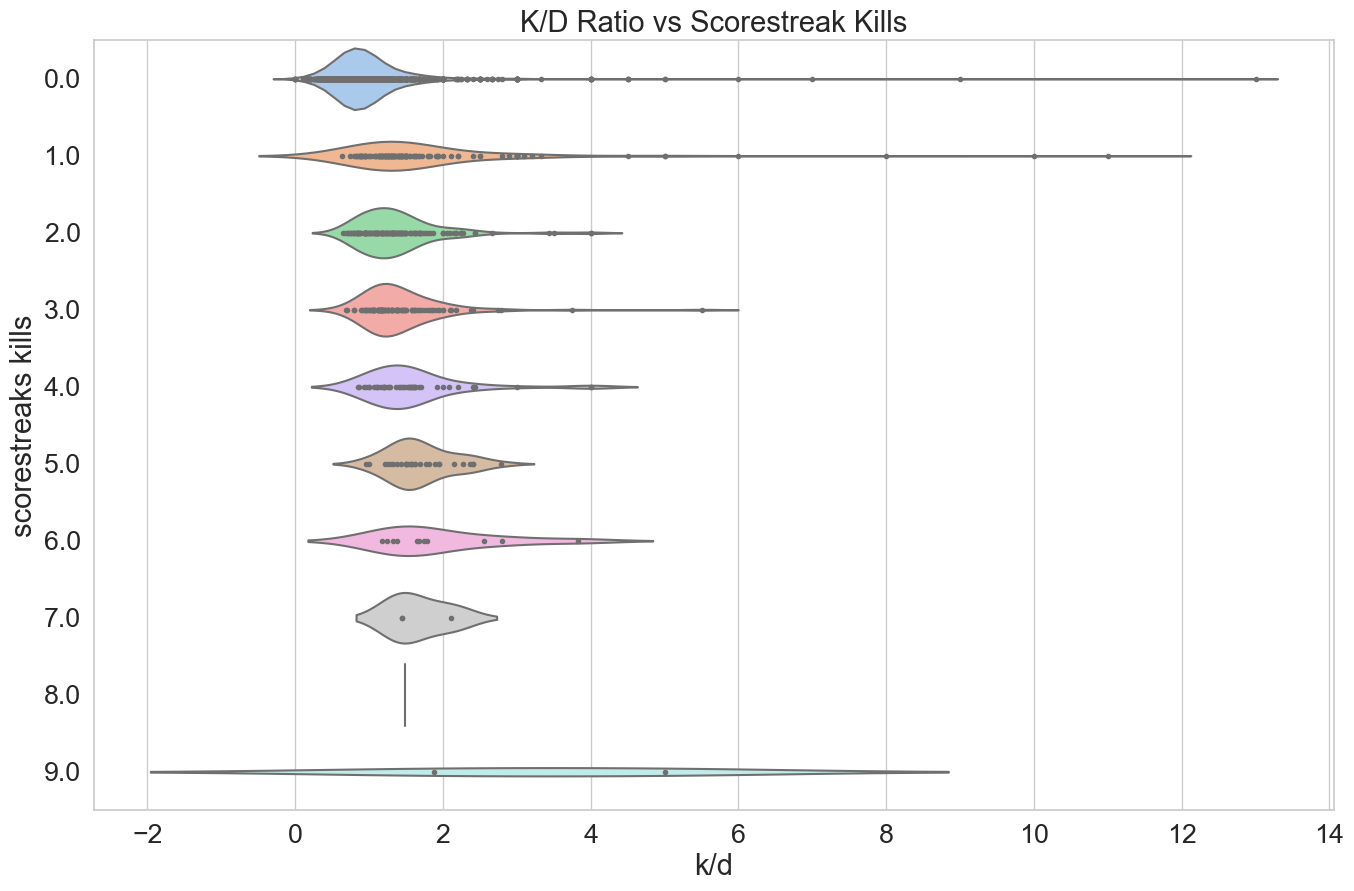

In [16]:
violin_helper('k/d','scorestreaks kills', 'K/D Ratio vs Scorestreak Kills')

## Player Score vs K/D (14)

[Text(0.5, 1.0, 'K/D Ratio vs Player Score')]

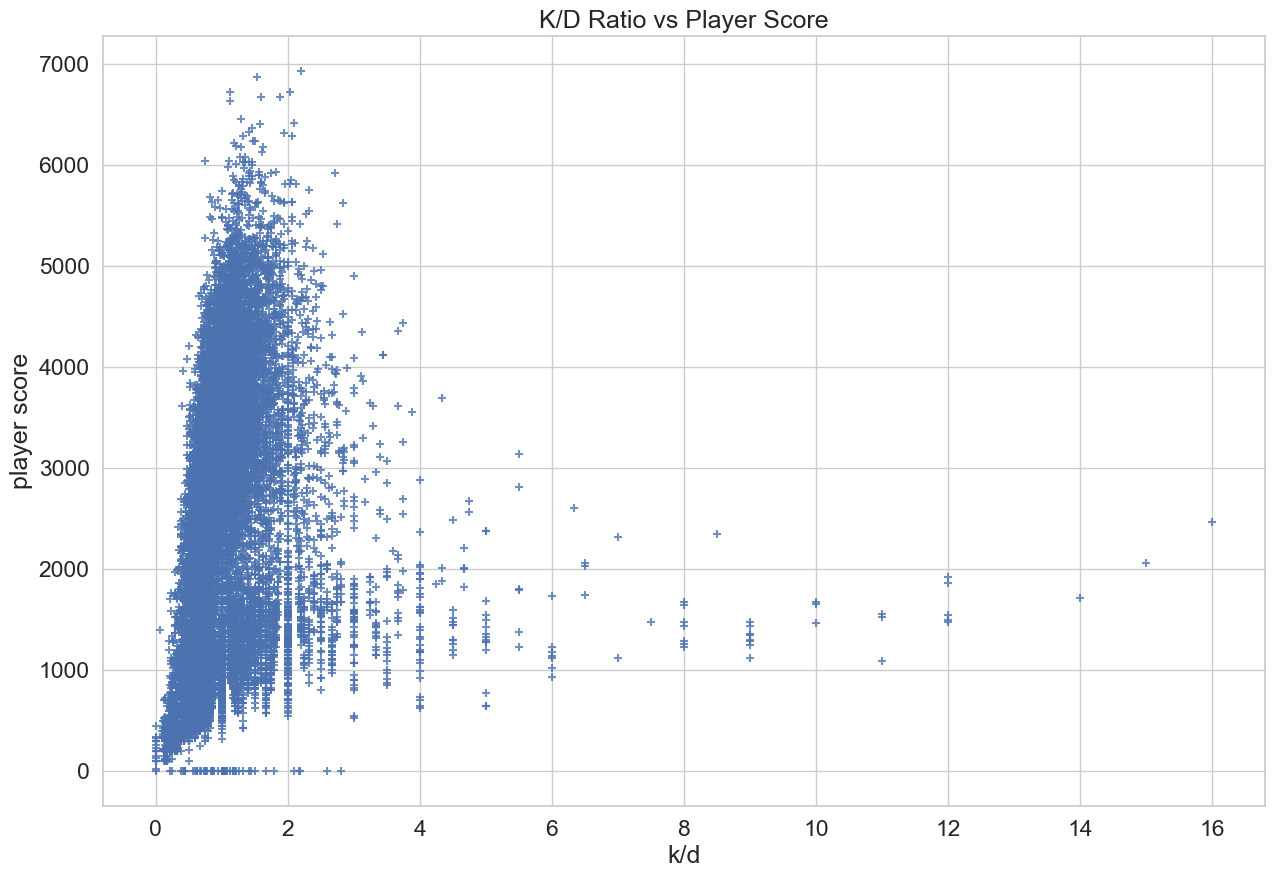

In [17]:
sns.set(style="whitegrid", rc={'figure.figsize':(15,10)}, font_scale=1.5)
sns.regplot(x=cod_data['k/d'],y=cod_data['player score'], marker="+", fit_reg=False).set(title = "K/D Ratio vs Player Score")

## Most Common Weapons Used (15)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Maddox RFB'),
  Text(1, 0, 'Saug 9mm'),
  Text(2, 0, 'ICR-7'),
  Text(3, 0, 'PPSh-41'),
  Text(4, 0, 'FG 42'),
  Text(5, 0, 'Paladin HB50'),
  Text(6, 0, 'KN-57'),
  Text(7, 0, 'Kar98k'),
  Text(8, 0, 'Rampart 17'),
  Text(9, 0, 'SwordFish'),
  Text(10, 0, 'BAR'),
  Text(11, 0, 'Spitfire'),
  Text(12, 0, 'GKS'),
  Text(13, 0, 'Grav'),
  Text(14, 0, 'Auger DMR'),
  Text(15, 0, 'Outlaw 308')])

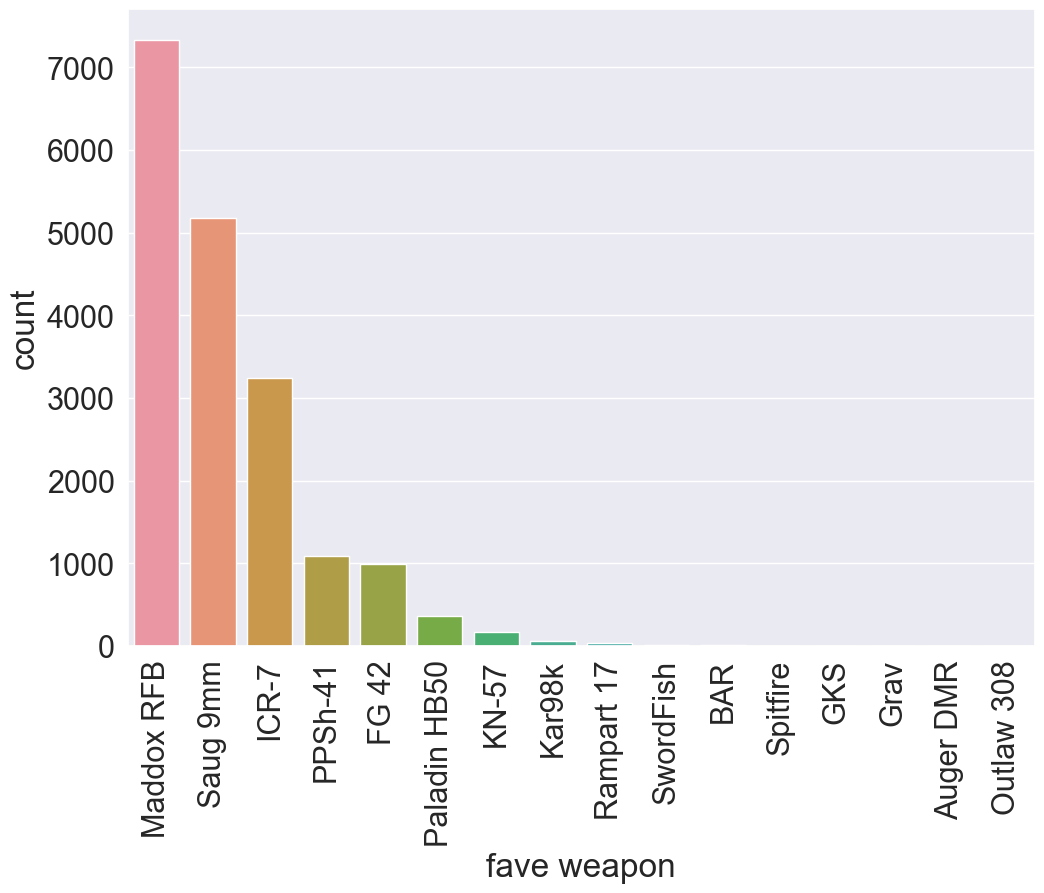

In [18]:
sns.set(rc={'figure.figsize':(11.7,8.27)}, font_scale=2)
sns.countplot(x=cod_data['fave weapon'], order = cod_data['fave weapon'].value_counts().index)
plt.xticks(rotation=90)

In [19]:
# helper method for comparing most used weapons trends
def distplot_helper(a):
    '''
    Plot the distribution usage between weapons
    a: list of weapons to compare with (string)
    title: the title of the graph (string)
    '''
    assert isinstance(a, list)
    for i in a:
        assert isinstance(i, str)
    plt.figure()
    sns.set(style = "whitegrid", font_scale=1.25, rc={'figure.figsize':(12,6)})
    for i in a:
        sns.distplot(cod_data[cod_data['fave weapon']==i]['kills per 10min'],hist=False, label=i)
    plt.legend()
    return

## Top 8 Most Used Weapons Compared (16)

C:\Users\cay10\AppData\Local\Temp\ipykernel_20844\3909880258.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cod_data[cod_data['fave weapon']==i]['kills per 10min'],hist=False, label=i)
C:\Users\cay10\AppData\Local\Temp\ipykernel_20844\3909880258.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

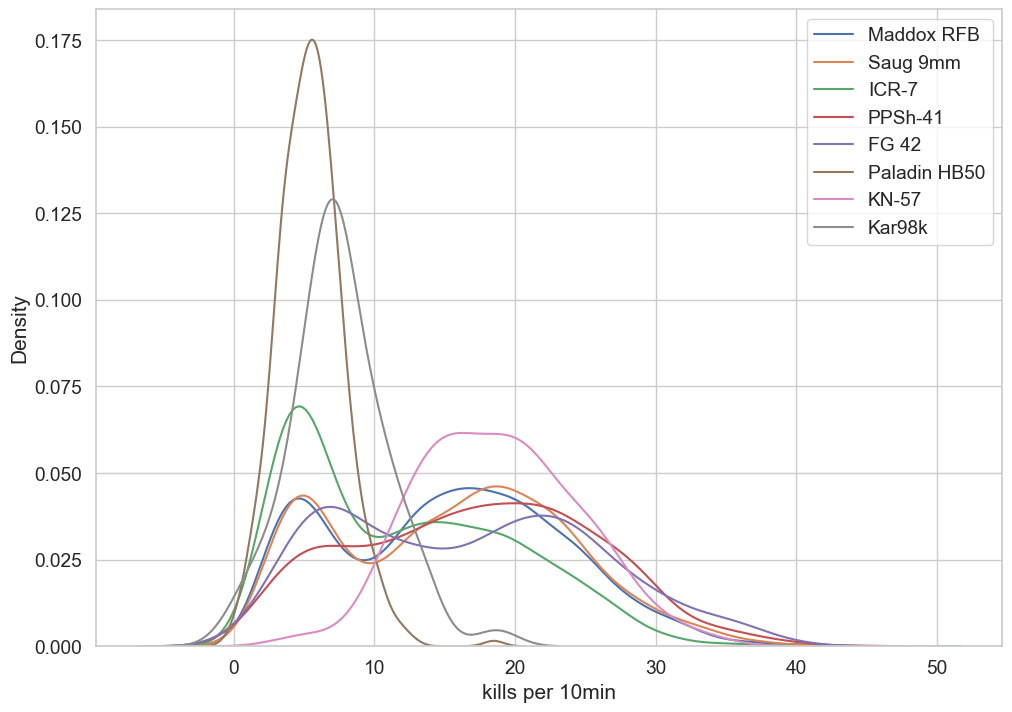

In [20]:
top_8_weapons = ['Maddox RFB','Saug 9mm','ICR-7','PPSh-41','FG 42','Paladin HB50','KN-57','Kar98k']
distplot_helper(top_8_weapons)

## Weapons Exhibiting Similar Distributions (17)

C:\Users\cay10\AppData\Local\Temp\ipykernel_20844\3909880258.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cod_data[cod_data['fave weapon']==i]['kills per 10min'],hist=False, label=i)
C:\Users\cay10\AppData\Local\Temp\ipykernel_20844\3909880258.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

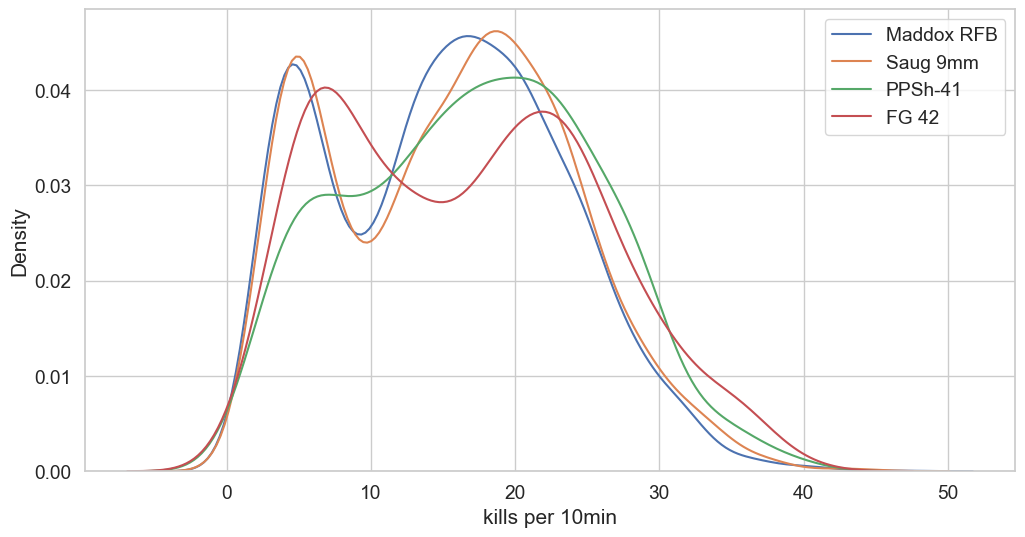

In [21]:
similar_weapons = ['Maddox RFB','Saug 9mm','PPSh-41','FG 42']
distplot_helper(similar_weapons)

## Weapons Displaying Different Trends(18)

C:\Users\cay10\AppData\Local\Temp\ipykernel_20844\3909880258.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cod_data[cod_data['fave weapon']==i]['kills per 10min'],hist=False, label=i)
C:\Users\cay10\AppData\Local\Temp\ipykernel_20844\3909880258.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372

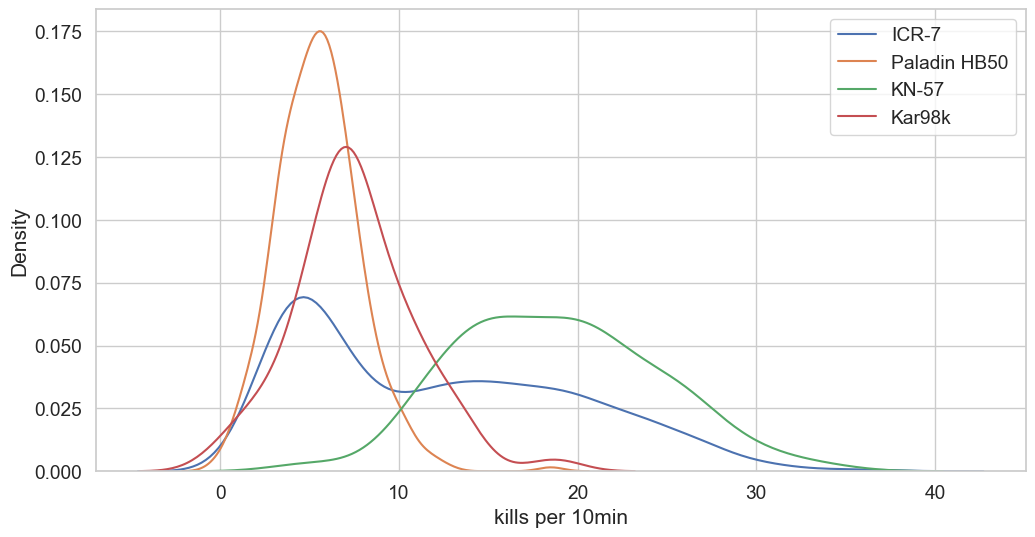

In [22]:
diff_weapons = ['ICR-7','Paladin HB50','KN-57','Kar98k']
distplot_helper(diff_weapons)

### Helper method to plot heatmaps to display relationships between labels

In [23]:
def plot_heatmap(df, x, y, norm='columns', annot=True, cmap='Blues', mode=False):
    """Plot heatmap of two properties.

    Args:
        df (pd.DataFrame): input dataset.
        x (str): property on x axis.
        y (str): property on y axis.
        norm (str, optional): normalization mode for pd.crosstab (‘all’, ‘index’, ‘columns’). Defaults to 'columns'.
        annot (bool, optional): Annotating values or not. Defaults to True.
        cmap (str, optional): colormap for sns.heatmap. Defaults to 'Blues'.
        mode: boolean if its mode or not
    """
    assert isinstance(df, pd.DataFrame)
    assert isinstance(x, str)
    assert isinstance(y, str)
    assert isinstance(norm, str) and (norm=='all' or norm=='index' or norm=='columns')
    assert isinstance(annot, bool)
    assert isinstance(cmap, str)
    if mode == False:
        sns.heatmap(pd.crosstab(df[y], df[x], normalize=norm), annot=annot, cmap=cmap)
    else:
        cross=pd.crosstab(df[y],df[x])
        row_sums = cross.sum(axis=1)
        normalized_data = cross / row_sums[:, np.newaxis]
        sns.set(font_scale=1.5)
        plt.figure(figsize=(30,6))
        sns.heatmap(normalized_data, annot=annot, cmap=cmap)

    return

## Weapon Popularity vs Game Mode (19)

C:\Users\cay10\AppData\Local\Temp\ipykernel_20844\2974634420.py:24: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  normalized_data = cross / row_sums[:, np.newaxis]


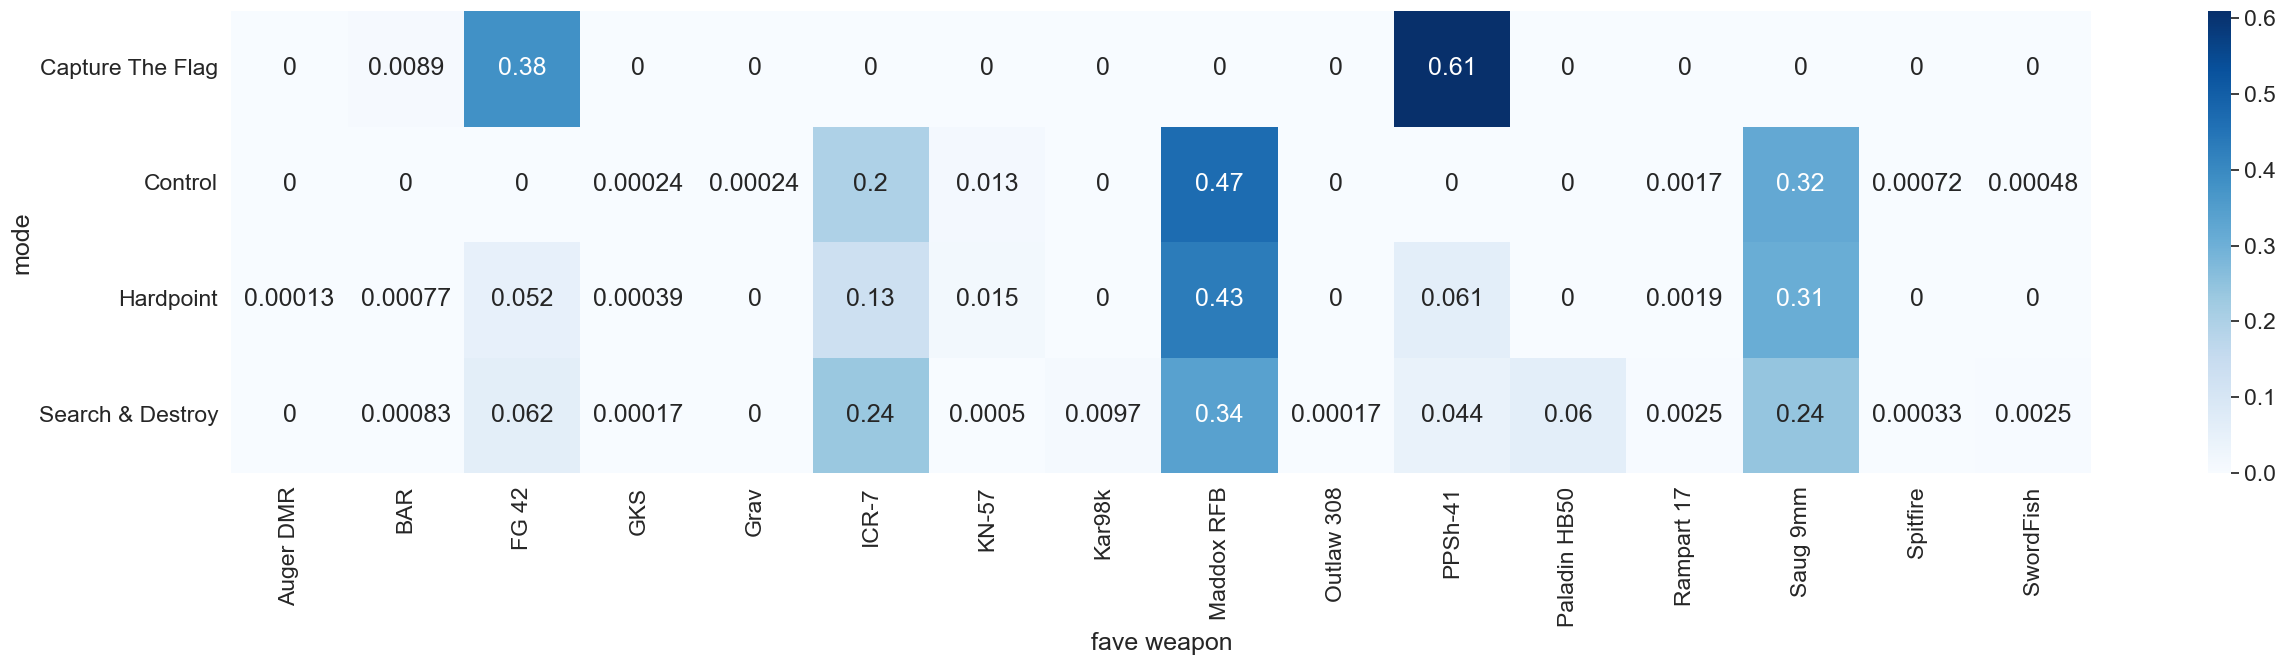

In [24]:
plot_heatmap(cod_data, 'fave weapon', 'mode', mode=True)

## Weapon Popularity vs Specialists (20)

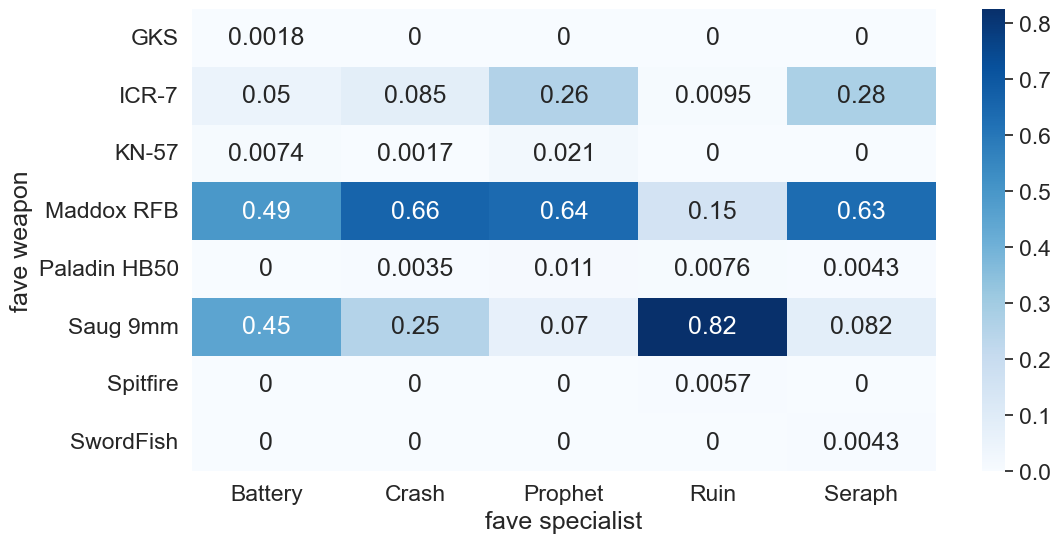

In [25]:
plot_heatmap(cod_data, 'fave specialist','fave weapon')